# IBM Capstone Project - New York Housing

# Question: Is there a strong correlation between the number of the top1 complaint per house and its building characteristics? 
(This is a compilation of module 3 and 4 of the IBM capstone project)




### Setup


#### Load required libraries

In [3]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

import types
from botocore.client import Config
import ibm_boto3

import seaborn as sns   #e.g., for plotting regression plot 

#### Store credentials

In [4]:
client_71372c36e9a34232ac120f9c0e55467b = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='UjhQYYrdlDcYsA70JYhXf8EZIV0_TAtHcTmhFOLNivwU',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

client_cred=client_71372c36e9a34232ac120f9c0e55467b

Bucket='datascienceandmachinelearningcaps-donotdelete-pr-7g85dz51ixpokk'

bucket=Bucket

#body = client_71372c36e9a3432ac120f9c0e55467b.get_object(Bucket='datascienceandmachinelearningcaps-donotdelete-pr-7g85dz51ixpokk',Key='BK_18v1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
#if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

## 1. Find top1 complaint for brooklyn and ceate new df as base for further investigation

#### Load data

Loading data out of csv.file from url

In [5]:
df_NYC_311_complaints_NEW1 = pd.read_csv('https://cocl.us/311_NYC_Dataset')

In [8]:
df_NYC_311_complaints_NEW1.head()

,Unnamed: 0,Unique Key,Created Date,Closed Date,Complaint Type,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Status,Resolution Description,Borough,Latitude,Longitude
0,0,45531130,02/02/2020 06:09:17 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10019.0,426 WEST 52 STREET,WEST 52 STREET,ADDRESS,NEW YORK,Open,The following complaint conditions are still o...,MANHATTAN,40.765132,-73.988993
1,1,45529784,02/02/2020 02:15:24 PM,NaN,UNSANITARY CONDITION,RESIDENTIAL BUILDING,11204.0,1751 67 STREET,67 STREET,ADDRESS,BROOKLYN,Open,The following complaint conditions are still o...,BROOKLYN,40.618484,-73.992673
2,2,45527528,02/02/2020 02:27:41 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,11372.0,87-15 37 AVENUE,37 AVENUE,ADDRESS,Jackson Heights,Open,The following complaint conditions are still o...,QUEENS,40.750269,-73.879432
3,3,45530329,02/02/2020 12:13:18 PM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10458.0,2405 SOUTHERN BOULEVARD,SOUTHERN BOULEVARD,ADDRESS,BRONX,Open,The following complaint conditions are still o...,BRONX,40.853773,-73.881558
4,4,45528814,02/02/2020 01:59:44 PM,NaN,APPLIANCE,RESIDENTIAL BUILDING,11209.0,223 78 STREET,78 STREET,ADDRESS,BROOKLYN,Open,The following complaint conditions are still o...,BROOKLYN,40.629745,-74.030533


In [9]:
#instead of replacing the data frame in every cell, we just replace the old data frame by the updated but and give it the old name. 
    #Aferwards run the code in every cell again.
df_NYC_311_complaints=df_NYC_311_complaints_NEW1

### Create new data frame with top1 complaint type

#### Top1 complaint type
'HEAT/HOT WATER'

#### Create new data frame with Top1 complaint type

In [11]:
df_Top1_complaint = df_NYC_311_complaints[(df_NYC_311_complaints['Complaint Type'].isin(['HEAT/HOT WATER']))]

In [12]:
df_Top1_complaint.head()

,Unnamed: 0,Unique Key,Created Date,Closed Date,Complaint Type,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Status,Resolution Description,Borough,Latitude,Longitude
0,0,45531130,02/02/2020 06:09:17 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10019.0,426 WEST 52 STREET,WEST 52 STREET,ADDRESS,NEW YORK,Open,The following complaint conditions are still o...,MANHATTAN,40.765132,-73.988993
2,2,45527528,02/02/2020 02:27:41 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,11372.0,87-15 37 AVENUE,37 AVENUE,ADDRESS,Jackson Heights,Open,The following complaint conditions are still o...,QUEENS,40.750269,-73.879432
3,3,45530329,02/02/2020 12:13:18 PM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10458.0,2405 SOUTHERN BOULEVARD,SOUTHERN BOULEVARD,ADDRESS,BRONX,Open,The following complaint conditions are still o...,BRONX,40.853773,-73.881558
5,5,45530344,02/02/2020 07:52:08 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10456.0,1131 MORRIS AVENUE,MORRIS AVENUE,ADDRESS,BRONX,Open,The following complaint conditions are still o...,BRONX,40.831381,-73.915218
7,7,45527939,02/02/2020 09:00:54 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,11372.0,37-20 81 STREET,81 STREET,ADDRESS,Jackson Heights,Open,The following complaint conditions are still o...,QUEENS,40.749320,-73.885190


#### Store new data frame (Top1_complaint) in new pickle file

In [13]:
#create pickle file

df_Top1_complaint.to_pickle('./df_Top1_complaint.pkl')   #"df_test3"=Name of data frame

#upload pickle file

client_cred.upload_file('./df_Top1_complaint.pkl',bucket,'df_Top1_complaint_cos.pkl')

#### Reload data - for sake of interruption and shut down of kernel

In [3]:
# Download the file from Cloud Object Store:
client_cred.download_file(Bucket=bucket,Key='df_Top1_complaint_cos.pkl',Filename='./df_Top1_complaint_local.pkl')

#Create a Dataframe out of the file:
df_Top1_complaint = pd.read_pickle('./df_Top1_complaint_local.pkl')

In [4]:
df_Top1_complaint.head(5)

,Unnamed: 0,Unique Key,Created Date,Closed Date,Complaint Type,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Status,Resolution Description,Borough,Latitude,Longitude
0,0,45531130,02/02/2020 06:09:17 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10019.0,426 WEST 52 STREET,WEST 52 STREET,ADDRESS,NEW YORK,Open,The following complaint conditions are still o...,MANHATTAN,40.765132,-73.988993
2,2,45527528,02/02/2020 02:27:41 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,11372.0,87-15 37 AVENUE,37 AVENUE,ADDRESS,Jackson Heights,Open,The following complaint conditions are still o...,QUEENS,40.750269,-73.879432
3,3,45530329,02/02/2020 12:13:18 PM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10458.0,2405 SOUTHERN BOULEVARD,SOUTHERN BOULEVARD,ADDRESS,BRONX,Open,The following complaint conditions are still o...,BRONX,40.853773,-73.881558
5,5,45530344,02/02/2020 07:52:08 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10456.0,1131 MORRIS AVENUE,MORRIS AVENUE,ADDRESS,BRONX,Open,The following complaint conditions are still o...,BRONX,40.831381,-73.915218
7,7,45527939,02/02/2020 09:00:54 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,11372.0,37-20 81 STREET,81 STREET,ADDRESS,Jackson Heights,Open,The following complaint conditions are still o...,QUEENS,40.749320,-73.885190


#### Build data frame of Top1 complaint for Brooklyn

In [14]:
df_Top1_brooklyn = df_Top1_complaint[(df_Top1_complaint['Borough'].isin(['BROOKLYN']))]
df_Top1_brooklyn.head() 

,Unnamed: 0,Unique Key,Created Date,Closed Date,Complaint Type,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Status,Resolution Description,Borough,Latitude,Longitude
9,9,45529416,02/02/2020 10:59:58 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,11207.0,303 WYONA STREET,WYONA STREET,ADDRESS,BROOKLYN,Open,The following complaint conditions are still o...,BROOKLYN,40.671497,-73.892812
14,14,45529877,02/02/2020 04:09:57 PM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,11226.0,297 LENOX ROAD,LENOX ROAD,ADDRESS,BROOKLYN,Open,The following complaint conditions are still o...,BROOKLYN,40.654202,-73.949260
20,20,45529853,02/02/2020 10:35:22 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,11204.0,2270 64 STREET,64 STREET,ADDRESS,BROOKLYN,Open,The following complaint conditions are still o...,BROOKLYN,40.613564,-73.979362
21,21,45528464,02/02/2020 11:46:12 PM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,11210.0,1655 FLATBUSH AVENUE,FLATBUSH AVENUE,ADDRESS,BROOKLYN,Open,The complaint you filed is a duplicate of a co...,BROOKLYN,40.630096,-73.944757
26,26,45529887,02/02/2020 09:43:11 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,11238.0,500 ST JOHNS PLACE,ST JOHNS PLACE,ADDRESS,BROOKLYN,Open,The complaint you filed is a duplicate of a co...,BROOKLYN,40.673297,-73.961592


In [ ]:
#create pickle file

df_Top1_complaint.to_pickle('./df_Top1_complaint.pkl')   #"df_test3"=Name of data frame

#upload pickle file

client_cred.upload_file('./df_Top1_complaint.pkl',bucket,'df_Top1_complaint_cos.pkl')

# 1. Prepare PLUTO data set (house characteristics for all addresses in Brooklyn) for merging

#### Load PLUTO data set for Brooklyn

In [13]:
body = client_71372c36e9a34232ac120f9c0e55467b.get_object(Bucket='datascienceandmachinelearningcaps-donotdelete-pr-7g85dz51ixpokk',Key='BK_18v1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)
df_data_2.head()
#list complaints according to boroughs with count; put the list to new frame

                                                      
body = client_71372c36e9a34232ac120f9c0e55467b.get_object(Bucket='datascienceandmachinelearningcaps-donotdelete-pr-7g85dz51ixpokk',Key='BK_18v1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_PLUTO_brooklyn_big = pd.read_csv(body)
df_PLUTO_brooklyn_big.head()
                                                  

,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,...,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLAG,PFIRM15_FLAG,Version
0,BK,1,1,302,21.0,NaN,13.0,33.0,11201.0,L118,...,NaN,302 007,30101.0,NaN,3.000010e+09,11/26/2013,1,1.0,1.0,18V1
1,BK,1,50,302,21.0,2000.0,13.0,33.0,11201.0,L118,...,NaN,302 007,30101.0,E-231,0.000000e+00,NaN,1,1.0,1.0,18V1
2,BK,1,7501,302,21.0,2000.0,13.0,33.0,11201.0,L118,...,NaN,302 007,30101.0,NaN,3.000010e+09,03/04/2016,1,1.0,1.0,18V1
3,BK,3,1,302,21.0,3002.0,13.0,33.0,11201.0,L118,...,NaN,302 007,30101.0,NaN,0.000000e+00,NaN,1,1.0,1.0,18V1
4,BK,3,5,302,21.0,NaN,13.0,33.0,11201.0,L118,...,NaN,302 007,30101.0,NaN,0.000000e+00,NaN,4,1.0,1.0,18V1


#### Cut the relevant colums out of the Brooklyn PLUTO dataset 

### Prepare PLUTO data set - with relevant house characteristcs

House characteristcs: NumBldgs, NumFloors, BldgDepth, YearBuilt, LotDepth

In [19]:
df_PLUTO_brookl_short = df_PLUTO_brooklyn_big[['Address','NumBldgs', 'NumFloors', 'BldgDepth', 'YearBuilt', 'LotDepth']].copy()
#'Address','NumBldgs', 'NumFloors', 'BldgDepth', 'YearBuilt', 'LotDepth
df_PLUTO_brookl_short.head()                             

,Address,NumBldgs,NumFloors,BldgDepth,YearBuilt,LotDepth
0,JOHN STREET,0,0.0,0.0,0,337.42
1,10 JAY STREET,1,10.0,195.0,1920,207.25
2,1 JOHN STREET,1,12.0,0.0,0,0.00
3,JAY STREET,15,0.0,0.0,0,469.00
4,JAY STREET,0,0.0,0.0,0,0.00


 #### PLUTO vorbereiten: Addresse als Index (1) und die relevanten Housing Features als weitere Spalten (2) 

#### build new data frame

In [20]:
df_Pluto=df_PLUTO_brookl_short
df_Pluto.head()

,Address,NumBldgs,NumFloors,BldgDepth,YearBuilt,LotDepth
0,JOHN STREET,0,0.0,0.0,0,337.42
1,10 JAY STREET,1,10.0,195.0,1920,207.25
2,1 JOHN STREET,1,12.0,0.0,0,0.00
3,JAY STREET,15,0.0,0.0,0,469.00
4,JAY STREET,0,0.0,0.0,0,0.00


In [21]:
# for sake of consistency, make all column labels of type string
df_Pluto.columns = list(map(str, df_Pluto.columns))

In [22]:
df_Pluto.head()

,Address,NumBldgs,NumFloors,BldgDepth,YearBuilt,LotDepth
0,JOHN STREET,0,0.0,0.0,0,337.42
1,10 JAY STREET,1,10.0,195.0,1920,207.25
2,1 JOHN STREET,1,12.0,0.0,0,0.00
3,JAY STREET,15,0.0,0.0,0,469.00
4,JAY STREET,0,0.0,0.0,0,0.00


In [23]:
# set Address as index 
df_Pluto.set_index('Address', inplace=True)

In [24]:
df_Pluto.head()

,NumBldgs,NumFloors,BldgDepth,YearBuilt,LotDepth
Address,,,,,
JOHN STREET,0,0.0,0.0,0,337.42
10 JAY STREET,1,10.0,195.0,1920,207.25
1 JOHN STREET,1,12.0,0.0,0,0.00
JAY STREET,15,0.0,0.0,0,469.00
JAY STREET,0,0.0,0.0,0,0.00


#see my own training lab from IBM course for preparing data in Pandas, e.g. dropping of columns, renaming, etc.
https://labs.cognitiveclass.ai/tools/jupyterlab/lab/tree/labs/DV0101EN/DV0101EN-Exercise-Pie-Charts-Box-Plots-Scatter-Plots-and-Bubble-Plots-py.ipynb?lti=true

# 3. Prepare top1 complaint data set - sorting according to addresses

In [25]:
#1  list complaints according to Incident Address with count; put the list to new frame
df_Top1_addresses = df_Top1_brooklyn[['Incident Address']]

In [27]:
df_Top1_addresses.head()

,Incident Address
9,303 WYONA STREET
14,297 LENOX ROAD
20,2270 64 STREET
21,1655 FLATBUSH AVENUE
26,500 ST JOHNS PLACE


In [28]:
df_Top1_AddressesCount = df_Top1_addresses['Incident Address'].value_counts().to_frame()

In [29]:
df_Top1_AddressesCount.head()

,Incident Address
9511 SHORE ROAD,4587
1711 FULTON STREET,2776
2750 HOMECREST AVENUE,2390
109 NORTH 7 STREET,1712
381 VERNON AVENUE,1421


In [31]:
#rename the index to 'Address':
df_Top1_AddressesCount.index.name = 'Address'


In [32]:
df_Top1_AddressesCount.head()

,Incident Address
Address,
9511 SHORE ROAD,4587
1711 FULTON STREET,2776
2750 HOMECREST AVENUE,2390
109 NORTH 7 STREET,1712
381 VERNON AVENUE,1421


##### create test data frame for testing the approach

In [33]:
#change colums names
df_Top1_AddressesCount.rename(columns={'Incident Address' : 'Count'}, inplace=True )

In [34]:
df_Top1_AddressesCount.head()

,Count
Address,
9511 SHORE ROAD,4587
1711 FULTON STREET,2776
2750 HOMECREST AVENUE,2390
109 NORTH 7 STREET,1712
381 VERNON AVENUE,1421


In [36]:
# for sake of consistency, make all column labels of type string
df_Top1_AddressesCount.columns = list(map(str, df_Top1_AddressesCount.columns))

In [37]:
#for sake of simplicity, rename data frame 
df_top1_brook=df_Top1_AddressesCount


# 4. Show the two data sets

In [38]:
print(df_top1_brook.shape)
df_top1_brook.head()

(34416, 1)


,Count
Address,
9511 SHORE ROAD,4587
1711 FULTON STREET,2776
2750 HOMECREST AVENUE,2390
109 NORTH 7 STREET,1712
381 VERNON AVENUE,1421


In [39]:
print(df_Pluto.shape)
df_Pluto.head()

(277316, 5)


,NumBldgs,NumFloors,BldgDepth,YearBuilt,LotDepth
Address,,,,,
JOHN STREET,0,0.0,0.0,0,337.42
10 JAY STREET,1,10.0,195.0,1920,207.25
1 JOHN STREET,1,12.0,0.0,0,0.00
JAY STREET,15,0.0,0.0,0,469.00
JAY STREET,0,0.0,0.0,0,0.00


# 5. Join the two data sets

#### join 311 dataset - top1 complaints for brookly - with PLUTO dataset for brooklyn

In [40]:
df1=df_top1_brook
df2=df_Pluto

In [41]:
df_inner_join = pd.merge(df1,  
                      df2,  
                      on ='Address',  
                      how ='inner') 
#With "how: inner" we get only the rows where both data sets overlap

In [43]:
df_joined=df_inner_join

In [44]:
df_joined.head()

,Count,NumBldgs,NumFloors,BldgDepth,YearBuilt,LotDepth
Address,,,,,,
9511 SHORE ROAD,4587,1,6.0,0.0,1957,0.00
2750 HOMECREST AVENUE,2390,1,7.0,163.0,1959,110.75
381 VERNON AVENUE,1421,2,2.0,48.0,1899,100.00
712 CROWN STREET,1238,1,6.0,200.0,1926,200.00
170 HAWTHORNE STREET,1101,1,6.0,90.5,1941,106.00


In [45]:
df_joined.shape

(26985, 6)

There are many adresses in the 311 data set that PLUTO data set doesn´t contain. 
Thus the new joined data set only contains much less addresses than the 311 data set for brooklyn with top1 complaints.

#### Articles on merging data sets ("vlookup for pandas")
- Most helpful article on vlookup using pandas: https://www.geeksforgeeks.org/how-to-do-a-vlookup-in-python-using-pandas/
- Big and good article on merging: https://medium.com/importexcel/common-excel-task-in-python-vlookup-with-pandas-merge-c99d4e108988
- Other article: https://stackoverflow.com/questions/25493625/vlookup-in-pandas-using-join

#### Store joined data set in new pickle file ("df_joined")

In [47]:
#create pickle file
df_joined.to_pickle('./df_joined.pkl')   #"df_test3"=Name of data frame

#upload pickle file
client_cred.upload_file('./df_joined.pkl',bucket,'df_joined_cos.pkl')



# 6. Wrangling data 


In [48]:
#1 replace "?" to NaN
df_joined.replace("?", np.nan, inplace = True)

1. Entweder Nullen durch mean ersetzen oder Zeilen löschen; m.E. wird das Ergebnis durch den mean verfälscht

#### Replace 0s by NaN 
(Reason: For example 0 can´t be the actual value, for if there is a building, there have to be at least one floor.)

In [49]:
df_joined.replace(0, np.nan, inplace = True)

In [50]:
df_joined.head()

,Count,NumBldgs,NumFloors,BldgDepth,YearBuilt,LotDepth
Address,,,,,,
9511 SHORE ROAD,4587,1.0,6.0,NaN,1957.0,NaN
2750 HOMECREST AVENUE,2390,1.0,7.0,163.0,1959.0,110.75
381 VERNON AVENUE,1421,2.0,2.0,48.0,1899.0,100.00
712 CROWN STREET,1238,1.0,6.0,200.0,1926.0,200.00
170 HAWTHORNE STREET,1101,1.0,6.0,90.5,1941.0,106.00


#### Store data set in new pickle file ("df_joined")

In [51]:
#create pickle file
df_joined.to_pickle('./df_joined.pkl')   #"df_..."=Name of data frame

#upload pickle file
client_cred.upload_file('./df_joined.pkl',bucket,'df_joined_cos.pkl')

#### Pickle file einlesen

In [63]:
# Download the file from Cloud Object Store:
client_cred.download_file(Bucket=bucket,Key='df_joined_cos.pkl',Filename='./df_joined_local.pkl')

#Create a Dataframe out of the file:
df_joined = pd.read_pickle('./df_joined_local.pkl')

#### Count NaNs 

In [52]:
#creating a new help data frame with "true", if NaN and "false" if not NaN
missing_data = df_joined.isnull()            

In [53]:
missing_data.head(3)

,Count,NumBldgs,NumFloors,BldgDepth,YearBuilt,LotDepth
Address,,,,,,
9511 SHORE ROAD,False,False,False,True,False,True
2750 HOMECREST AVENUE,False,False,False,False,False,False
381 VERNON AVENUE,False,False,False,False,False,False


In [54]:
#Count missing values in each column

#Using a for loop in Python, we can quickly figure out the number of missing values in each column. 
     #In the body of the for loop the method ".value_counts()" counts the number of "True" values.

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

Count
False    26985
Name: Count, dtype: int64

NumBldgs
False    26859
True       126
Name: NumBldgs, dtype: int64

NumFloors
False    26839
True       146
Name: NumFloors, dtype: int64

BldgDepth
False    26619
True       366
Name: BldgDepth, dtype: int64

YearBuilt
False    26805
True       180
Name: YearBuilt, dtype: int64

LotDepth
False    26887
True        98
Name: LotDepth, dtype: int64



### Build a new data set without NaNs with ALL 5 features 

In [64]:
# drop lines with NaN
df_joined_clean=df_joined.dropna()
print(df_joined_clean.shape)

(26554, 6)


In [65]:
df_joined_clean.head()

,Count,NumBldgs,NumFloors,BldgDepth,YearBuilt,LotDepth
Address,,,,,,
2750 HOMECREST AVENUE,2390,1.0,7.0,163.0,1959.0,110.75
381 VERNON AVENUE,1421,2.0,2.0,48.0,1899.0,100.00
712 CROWN STREET,1238,1.0,6.0,200.0,1926.0,200.00
170 HAWTHORNE STREET,1101,1.0,6.0,90.5,1941.0,106.00
417 LORIMER STREET,1061,1.0,3.0,120.5,1984.0,127.00


#### Store "df_joined_clean" as a 3rd  pickle file "df_joined_clean"

In [66]:
#create pickle file
df_joined_clean.to_pickle('./df_joined_clean.pkl')   #"df_test3"=Name of data frame

#upload pickle file
client_cred.upload_file('./df_joined_clean.pkl',bucket,'df_joined_clean_cos.pkl')

# 7. Evaluate correlation between 5 building features and number of complaints

In [67]:
df_clean =df_joined_clean 

In [68]:
df_clean.corr()

,Count,NumBldgs,NumFloors,BldgDepth,YearBuilt,LotDepth
Count,1.000000,-0.007790,0.186924,0.113899,0.005077,0.096160
NumBldgs,-0.007790,1.000000,0.024480,0.038057,0.019592,0.300519
NumFloors,0.186924,0.024480,1.000000,0.241874,0.181049,0.332159
BldgDepth,0.113899,0.038057,0.241874,1.000000,0.074846,0.324990
YearBuilt,0.005077,0.019592,0.181049,0.074846,1.000000,0.112793
LotDepth,0.096160,0.300519,0.332159,0.324990,0.112793,1.000000


## Regression Analysis for the 5 features

#### #1 NumBldgs

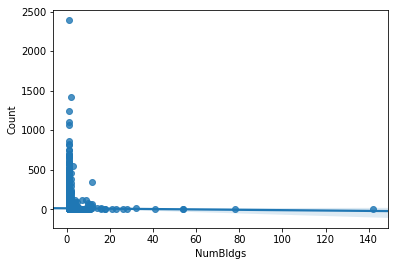

In [69]:
# NumBldgs as potential predictor variable of Count
sns.regplot(x="NumBldgs", y="Count", data=df_clean)


NumBldgs does not seem like a good predictor of the occurence of complaints at all since the regression line is close to horizontal. 
Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore it's it is not a reliable variable.


#### #2 NumFloors

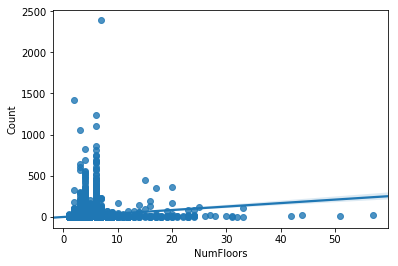

In [70]:
# NumFloors as potential predictor variable of Count
sns.regplot(x="NumFloors", y="Count", data=df_clean)

There is a weak correlation between NumFloors and number of complaints. But the data points are very scattert. For example we, both have a very high and a very low number of counts for number of floors close to 0.

Thus we can´t say that there is a strong relationship between number of floors and number of complaints. 

#### #3 BldgDepth

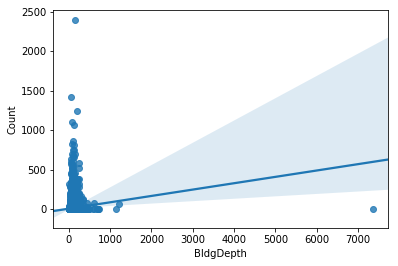

In [71]:
# BldgDepth as potential predictor variable of Count
sns.regplot(x="BldgDepth", y="Count", data=df_clean) 

There is a weak correlation between BldgDepth and number of complaints. But the data points are very scattert. For example we, both have a very high and a very low number of counts for BldgDepth close to 0.

Thus we can´t say that there is a strong relationship between BldgDepth and number of complaints.

#### #4 YearBuilt 	

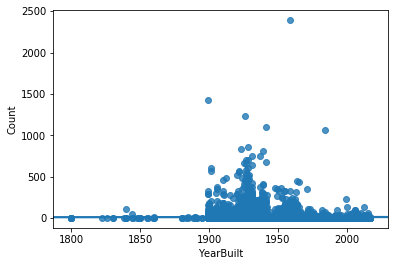

In [72]:
# YearBuilt as potential predictor variable of Count
sns.regplot(x="YearBuilt", y="Count", data=df_clean) 

YearBuilt does not seem like a good predictor of the occurence of complaints at all since the regression line is horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. 

Therefore YearBuilt is not a reliable variable.

#### #5 LotDepth

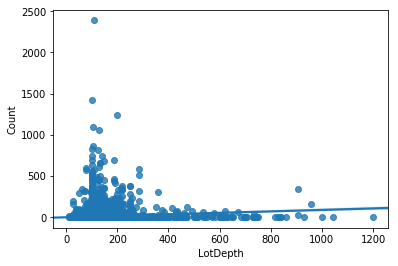

In [73]:
# LotDepth as potential predictor variable of Count
sns.regplot(x="LotDepth", y="Count", data=df_clean) 

There is a weak correlation between LotDepth and number of complaints. But the data points are very scattert. For example we, both have a very high and a very low number of counts for BldgDepth close to 0.

Thus we can´t say that there is a strong relationship between LotDepth and number of complaints.


# 8. Answer
#### Regression analysis shows that there is only zero to a very weak correlation between building characteristics and number of top1 complaints* in Brooklyn.** 
(And that there is even a weak and not zero correlation is based only on outliers.)
#### The data points are very scattert. For example we both have a very high and a very low number of counts for the same value of the several features.
#### Thus we can´t say that there is any strong relationship between one single or several building characteristcs and number of complaints.